In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import trackbact as tb

c:\Users\mriza\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Load the data

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


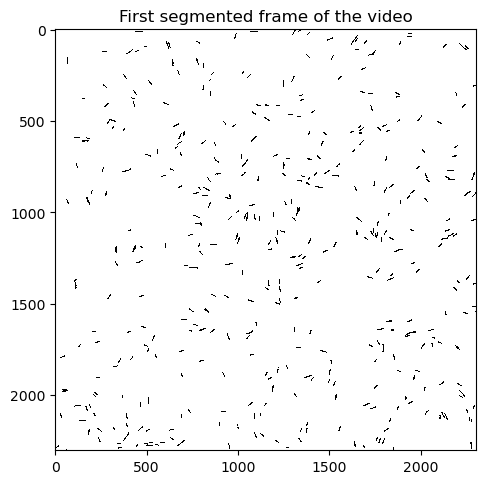

2304 2304


In [2]:
file_name="pilH_dense_mSc.tif"
im=tb.load_tif(file_name, show=True)
tifdim1=im.shape[1]
tifdim2=im.shape[2]
print(tifdim1, tifdim2)

# Fit ellipses to the contours

Finding the contour of the bacteria...: 100%|██████████| 200/200 [00:00<00:00, 239.76it/s]


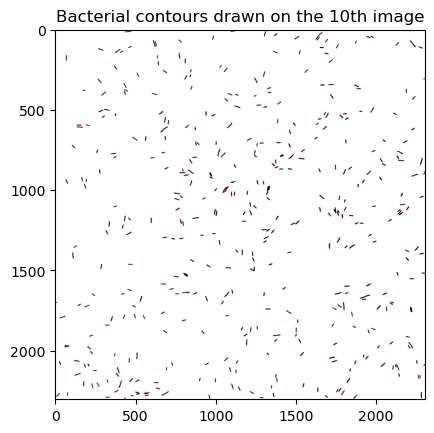

Fitting ellipses to the contours...: 100%|██████████| 200/200 [00:00<00:00, 301.01it/s]


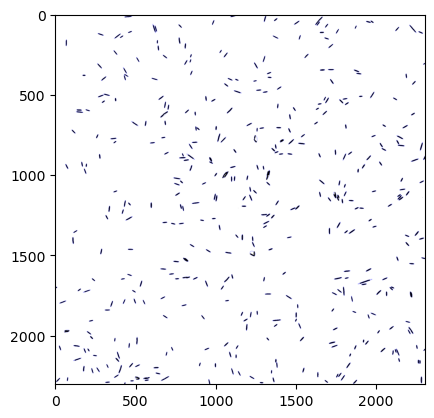

In [3]:
fitted_ellipses=tb.fit_ellipses(im, show_nth_frame=10, filter_max=(8,60))

# Format the data and plot the distribution of alignment angles

,x,y,frame,major_axis_size,minor_axis_size,body_angle
0,63.335365,2300.847656,0,13.432899,5.698264,47.701675
1,1852.221069,2297.835693,0,16.904724,5.823165,8.277697
2,1271.914307,2289.281006,0,24.360962,5.967599,82.002548
3,355.131378,2290.897705,0,29.223640,5.812747,77.162697
4,7.650183,2290.168213,0,39.926300,6.018880,52.164131
...,...,...,...,...,...,...
76769,2263.331055,6.550769,199,19.678921,4.981118,135.646927
76770,1670.389282,6.873578,199,33.062607,3.928048,57.323318
76771,1379.774292,6.470076,199,34.700546,4.631261,156.559418
76772,1097.357910,9.621296,199,26.105391,5.557971,8.183462


Converting ellipses to particles: 100%|██████████| 200/200 [00:03<00:00, 53.56it/s]


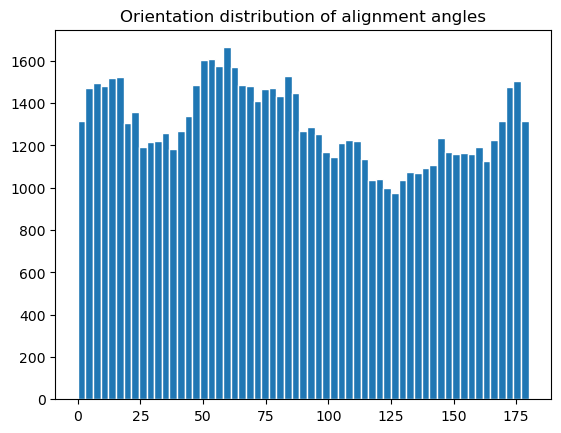

In [4]:
#format the fitted ellipses into a dataframe for tracking
ellipses_df=tb.format_ellipses(fitted_ellipses)
display(ellipses_df)

#For PIV analysis, we transform ellipses into single points
tb.ellipse_to_particle(im, file_name, ellipses_df)


plt.hist(ellipses_df["body_angle"], bins=59, histtype='bar', ec='white')

#This is just a demo not final
plt.title("Orientation distribution of alignment angles")
plt.show()


In [5]:
import trackpy.diag
trackpy.diag.performance_report()

Yes, but could it be faster?
FAST: numba is available and enabled (fast subnets and feature-finding).


# Track the bacteria

In [6]:
traj_tp = tb.track_bacteria(ellipses_df, max_search_range=10, min_search_range=2)
display(traj_tp)

Frame 199: 415 trajectories present.


,x,y,frame,major_axis_size,minor_axis_size,body_angle,particle
0,63.335365,2300.847656,0,13.432899,5.698264,47.701675,0
1,63.376377,2299.443604,1,21.432013,6.460067,40.188511,0
2,64.805603,2298.151367,2,27.274609,6.336607,36.915421,0
3,67.410072,2294.255615,3,25.505547,6.137639,34.943344,0
4,69.994751,2292.359619,4,25.416754,6.442495,35.812584,0
...,...,...,...,...,...,...,...
76769,66.002243,2253.229736,199,25.947447,4.541674,148.820724,1399
76770,824.466675,870.935730,199,29.069426,5.306165,20.971075,1400
76771,820.946777,839.791565,199,28.893948,5.060101,160.521652,1401
76772,823.188660,1093.832153,199,35.268040,4.752950,67.711807,1402


In [7]:
filtered=tb.filter_trajectories(traj_tp,50)

,particle,count
0,230,200
1,363,200
2,371,200
3,369,200
4,144,200
...,...,...
484,1106,51
485,1129,51
486,1130,51
487,1122,51


# Plot trajectories

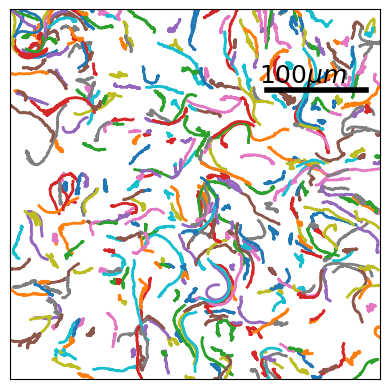

In [8]:
tb.plot_traj_all(filtered, imdim1=tifdim1, imdim2=tifdim2, pix_size=0.1615)

# Calculate the kinematic parameters such as velocity and acceleration etc.

In [9]:
particle_params=tb.calculate_kinematic_parameters(filtered)
display(particle_params)

,x,y,frame,major_axis_size,minor_axis_size,body_angle,particle,vx,vy,vel,ax,ay,acc,angle,angular_vel,angular_acc
0,63.335365,2300.847656,0,13.432899,5.698264,47.701675,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63.376377,2299.443604,1,21.432013,6.460067,40.188511,0,0.041012,-1.404053,1.404652,NaN,NaN,NaN,-1.541595,NaN,NaN
2,64.805603,2298.151367,2,27.274609,6.336607,36.915421,0,1.429226,-1.292236,1.926801,1.388214,0.111816,1.392710,-0.735104,0.806491,NaN
3,67.410072,2294.255615,3,25.505547,6.137639,34.943344,0,2.604469,-3.895752,4.686165,1.175243,-2.603516,2.856482,-0.981497,-0.246393,-1.052885
4,69.994751,2292.359619,4,25.416754,6.442495,35.812584,0,2.584679,-1.895996,3.205521,-0.019791,1.999756,1.999854,-0.632891,0.348606,0.595000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65742,1913.477905,1562.498169,195,35.139336,4.808214,82.459312,1130,2.252319,-1.032471,2.477688,2.764771,-0.477051,2.805625,-0.429820,1.886158,4.804456
65743,1914.547119,1561.437134,196,32.421623,5.425015,83.114525,1130,1.069214,-1.061035,1.506325,-1.183105,-0.028564,1.183450,-0.781559,-0.351739,-2.237897
65744,1919.753418,1561.645752,197,33.578632,5.070406,78.370682,1130,5.206299,0.208618,5.210477,4.137085,1.269653,4.327527,0.040049,0.821608,1.173347
65745,1918.692749,1561.604004,198,34.983212,5.548517,79.736298,1130,-1.060669,-0.041748,1.061490,-6.266968,-0.250366,6.271967,-3.102253,-3.142302,-3.963910
